In this file, we are going to explore the dataset to get insights into features and target variables. This is helpful for preprocessing data, which is a key step towards creating an accurate model. To do that, first, we need to identify categorical and numerical variables. For categorical variables, rare lables shoude be handled , and it is important to transfer them to numerical space to feed the model. For numerical variables, we should plot the distribution of each variable, and check and resolve (if necessary) skewness. For both of them, missing data should be handled, which depends on the type of the variable, its importance, and its values.

# 1- Import Libraries and Config Project

In [4]:
import numpy as np
import pandas as pd

# for visualiztion
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\mj.yousefi\AppData\Local\Temp\ipykernel_35932\1220770849.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# config

# for showing all data columns
pd.pandas.set_option("display.max_columns", None)

# 2- Load Data

In [6]:
# load dataset

data_df = pd.read_csv("dataset/train.csv", index_col=False)

print("data_df.shape:", data_df.shape)
data_df.head()

data_df.shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3- Eploratory Data Analysis

In this section we are going to analyze dataset including both categorical and numerical variables, and target variable.

## 3.1 Target Varialbe

In [7]:
target_variable = "SalePrice"

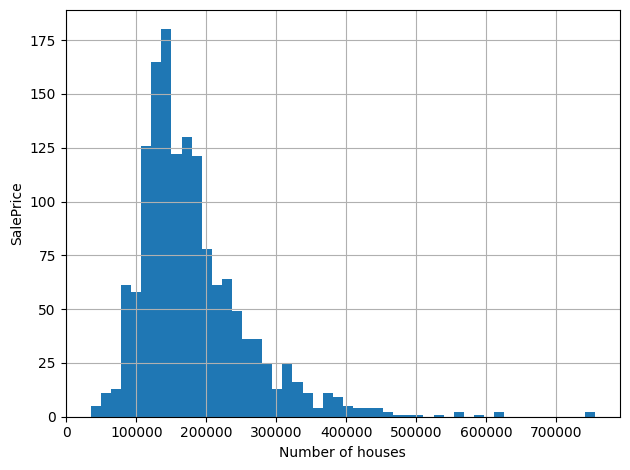

In [8]:
data_df[target_variable].hist(bins=50)
plt.xlabel("Number of houses")
plt.ylabel(target_variable)
plt.tight_layout()
plt.show()

Based on the salePrice histogram, the target variable is continuous. Thus, we the problem is a regression problem. Moreover, the histogram shows that the target variable's distribution is right skewed, and we should consider this. for example, we can transform this variable to another space to remove or reduce the skeweness.

# transform target variable by log transformation

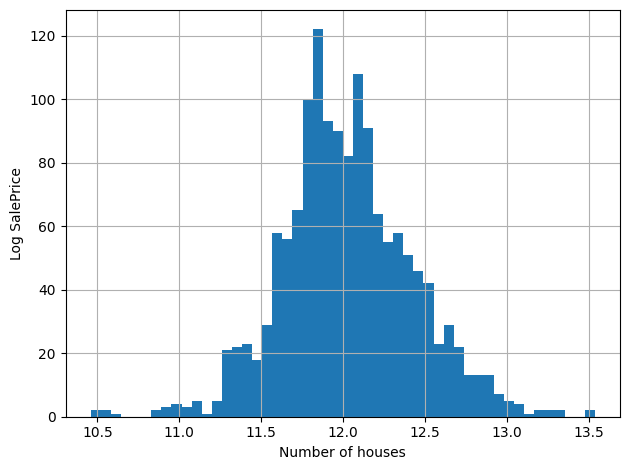

In [9]:
sale_price_log = np.log(data_df[target_variable])
sale_price_log.hist(bins=50)
plt.xlabel("Number of houses")
plt.ylabel(f"Log {target_variable}")
plt.tight_layout()
plt.show()

After applying logarithmic transformation, we see that the target variable's distribution becomes more normalized by transforming it to logarithm space. So later on, in the feature engineering section, we are going to transform the target variable by logarithmic transformation.

## 3.2 Predictor Variables

Now we explore predictor variables. It is important to detect categorical and numerical veriables, and also correlation between them.

In [10]:
# print variable info
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# first, we remove id variable which is house identifier
data_df.drop(columns=["Id"], inplace=True)

In [12]:
# then, we detect categorical variables which contains all object columns and MSSubClass
cat_vars = [var for var in data_df.columns if data_df[var].dtype == "O"]
cat_vars = cat_vars + ["MSSubClass"]

# other variables are our numerical variables
num_vars = [var for var in data_df.columns if var not in (cat_vars + [target_variable])]

print("cat_vars:", cat_vars)
print("cat_vars len:", len(cat_vars))

print("num_vars:", num_vars)
print("num_vars len:", len(num_vars))

cat_vars: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']
cat_vars len: 44
num_vars: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',

# 3.3 Missing Values

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64


Text(0, 0.5, 'Percentage of missing values')

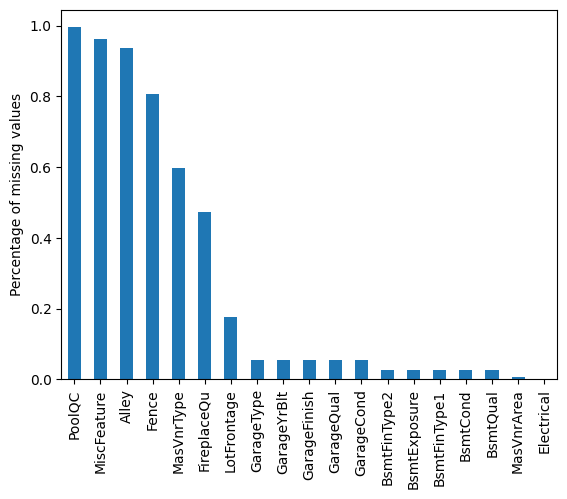

In [13]:
# First, detect variables that have missing values
vars_with_na = [var for var in data_df.columns if data_df[var].isnull().sum() > 0]
print(vars_with_na)

# show the percentage of missing values in each variable with missing values
missing_values_avg = data_df[vars_with_na].isnull().mean().sort_values(ascending=False)
print(missing_values_avg)
missing_values_avg.plot.bar()
plt.ylabel("Percentage of missing values")

This can help to eliminate features with high missing value rate.

# 3.4 Numerical Variables

In [14]:
# list of temporal variables

year_vars = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]

data_df[year_vars]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


We visualize the change of sale price by changin each year variable

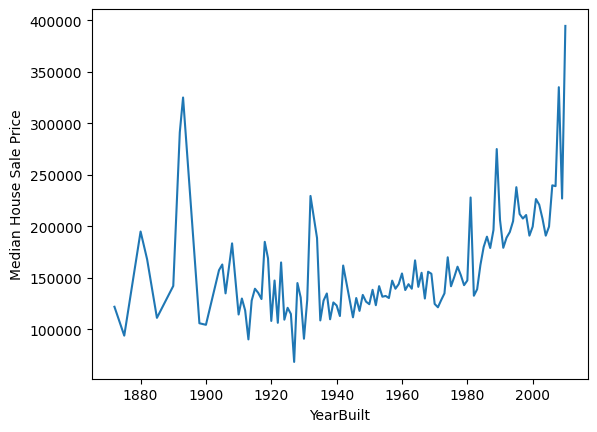

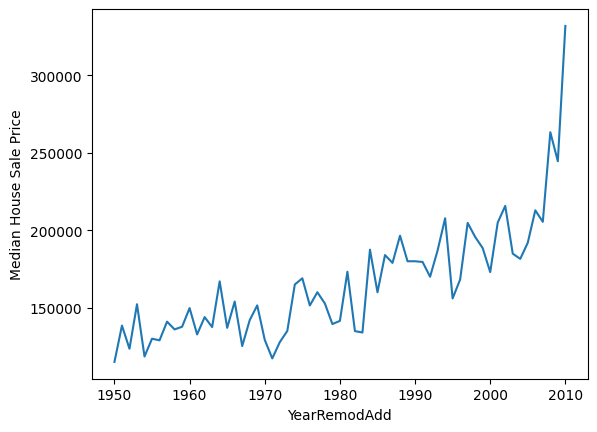

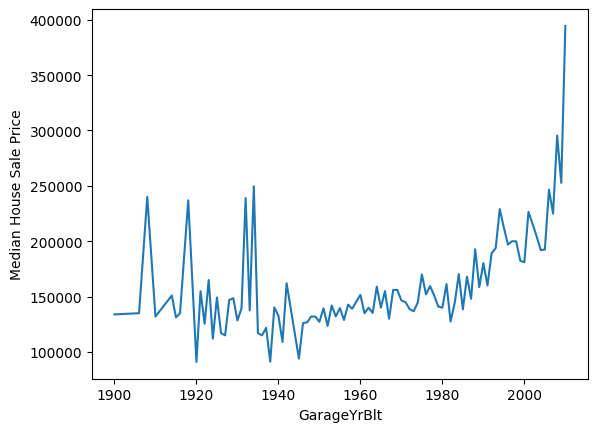

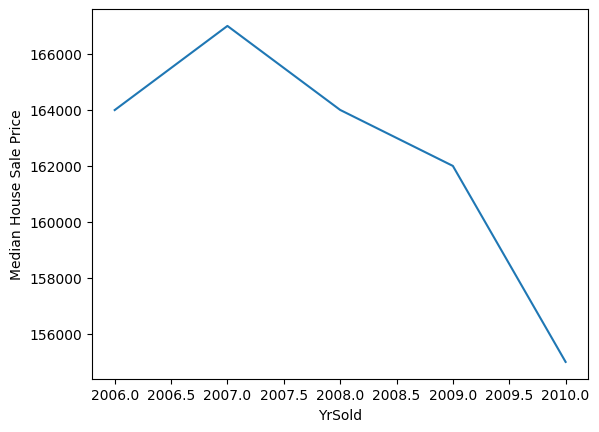

In [15]:
# plot

for year_var in year_vars:
    data_df.groupby(year_var)[target_variable].median().plot()
    plt.ylabel("Median House Sale Price")
    plt.xlabel(year_var)
    plt.show()

Next, we analyse the year vars since the house was built 

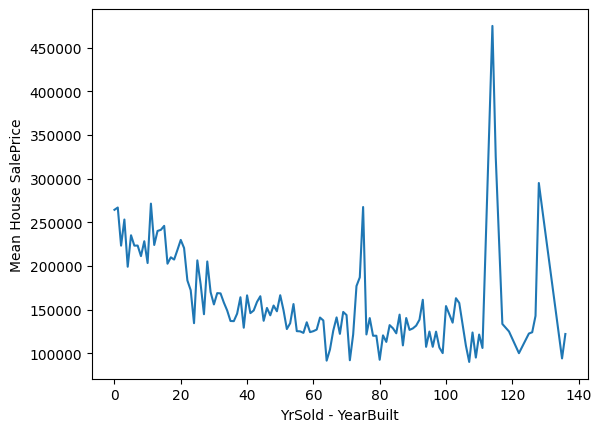

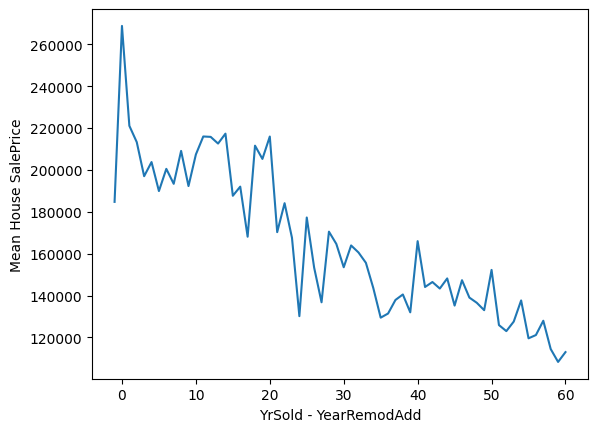

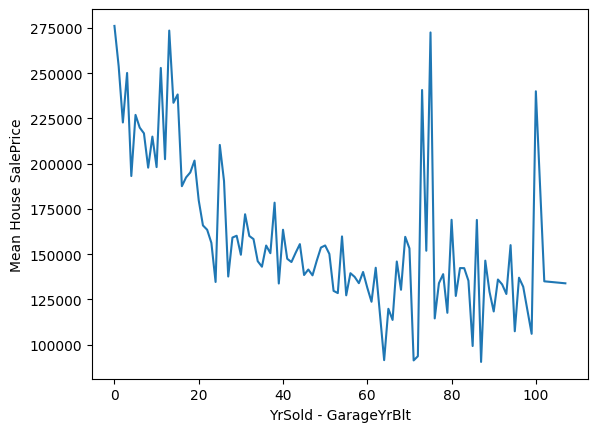

In [16]:
# plot relation between mean salse price and the defrence between year_var and builtYear
def plot_mean_price_by_year_diff(df: pd.DataFrame, year_var: str) -> None:

    # copy df to avoid manipulating mutable variable
    df = df.copy()

    df[year_var] = df["YrSold"] - df[year_var]

    df.groupby(year_var)["SalePrice"].mean().plot()
    plt.ylabel("Mean House SalePrice")
    plt.xlabel(f"YrSold - {year_var}")
    plt.show()


for year_var in year_vars:
    if year_var != "YrSold":
        plot_mean_price_by_year_diff(data_df, year_var=year_var)

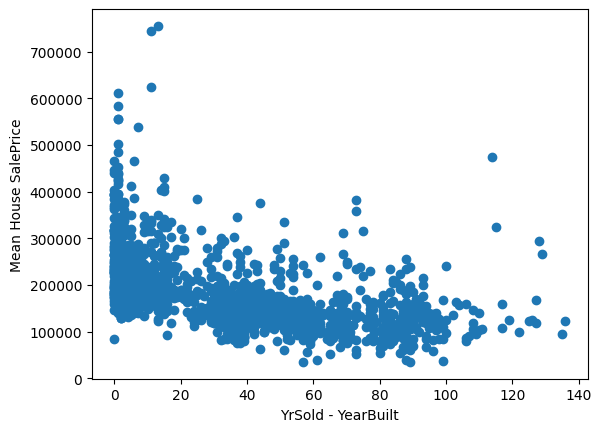

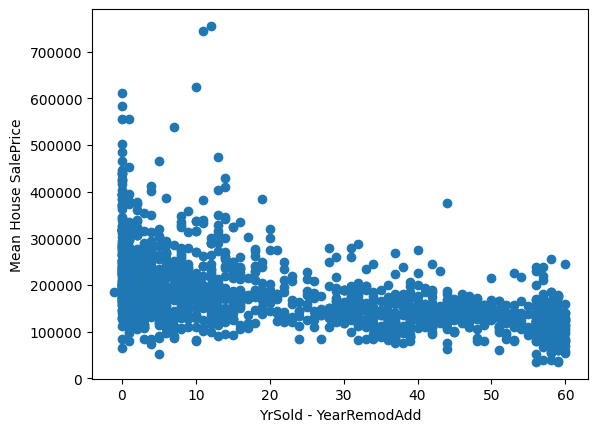

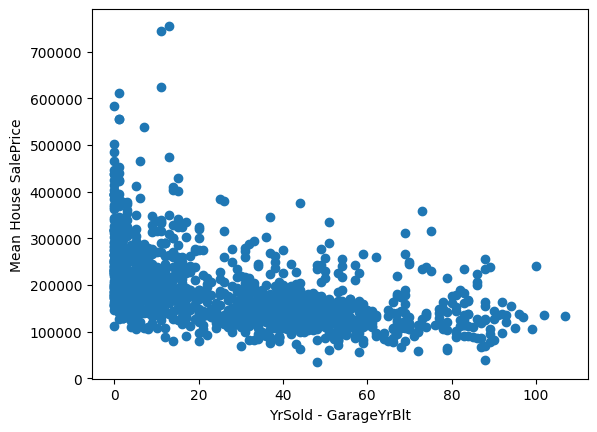

In [17]:
# plot relation between salse price and the defrence between year_var and builtYear
def plot_price_by_year_diff(df: pd.DataFrame, year_var: str) -> None:

    # copy df to avoid manipulating mutable variable
    df = df.copy()

    df[year_var] = df["YrSold"] - df[year_var]

    plt.scatter(df[year_var], df["SalePrice"])
    plt.ylabel("Mean House SalePrice")
    plt.xlabel(f"YrSold - {year_var}")
    plt.show()


for year_var in year_vars:
    if year_var != "YrSold":
        plot_price_by_year_diff(data_df, year_var=year_var)

In the next step, we separate discrete and continuous variables. To do that, we define a threshold for the size of unique values in a variable that can determine its type.

In [18]:
DISCRETE_VAR_NUM_THRESHOLD = 15


num_discrete_vars = [
    var
    for var in num_vars
    if (len(data_df[var].unique()) <= DISCRETE_VAR_NUM_THRESHOLD)
    and (var not in year_vars)
]

print(num_discrete_vars)

data_df[num_discrete_vars].head()

['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold']


,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


The result from previous cell shows that these variables demonstrate quality, which are like ordinal categorical values. Other variables are continuous variables.

In [19]:
#

num_cont_vars = [var for var in num_vars if var not in num_discrete_vars]

print(num_cont_vars)

data_df[num_cont_vars].head()

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'YrSold']


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,2008
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,2007
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,2008
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,2006
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,2008


Now, we should plot histogram of each continuous variable to analyse the skeweness.

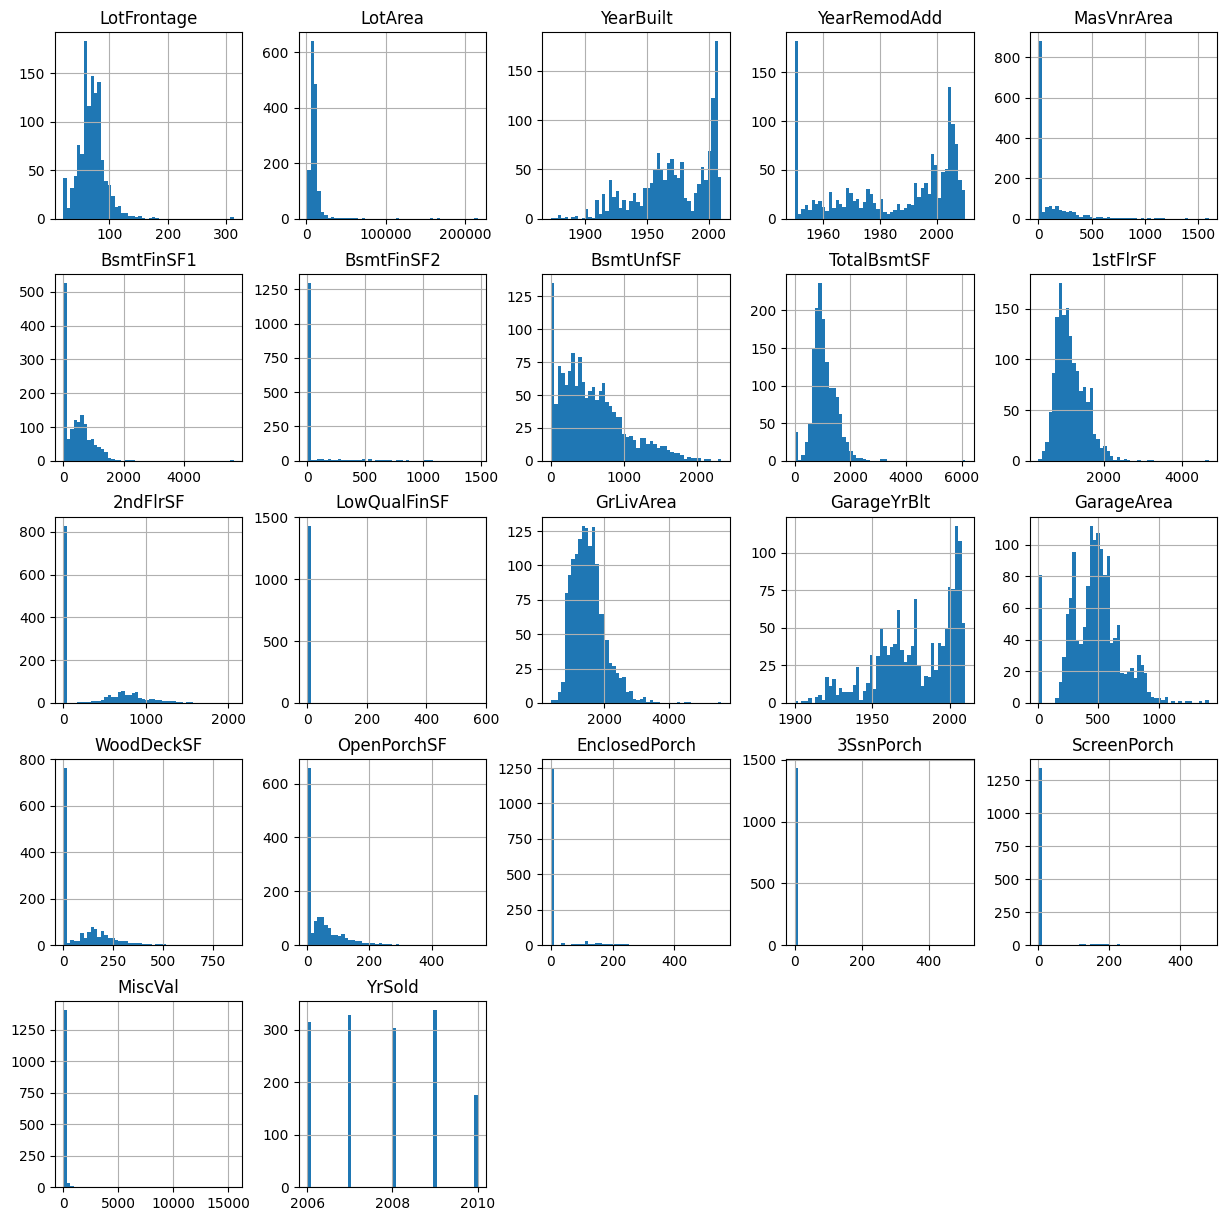

In [20]:
data_df[num_cont_vars].hist(bins=50, figsize=(15, 15))
plt.show()

We can see that some variables are not normally distributed, and some variables are super skewed such as ScreenPorch. On the other hand, some other variables such as LotFrontage have miler skeweness. For variables with high skeweness we use a binary transformation, and for others we apply Yeo-Johonson transformation.

In [21]:
print(num_cont_vars)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'YrSold']


In [22]:
# store super skewed and skewed variables
num_super_skewed_vars = [
    "BsmtFinSF1",
    "LowQualFinSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "MiscVal",
]


num_norm_vars = ["MoSold"]
print("num_norm_vars", num_norm_vars)

num_skewed_vars = [
    var
    for var in num_cont_vars
    if var not in num_super_skewed_vars and var not in year_vars
]
print("num_skewed_vars", num_skewed_vars)

num_norm_vars ['MoSold']
num_skewed_vars ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


### Logarithmic and Yeo-Johonson transformation

C:\Users\mj.yousefi\AppData\Local\Temp\ipykernel_35932\3830943637.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(0, inplace=True)


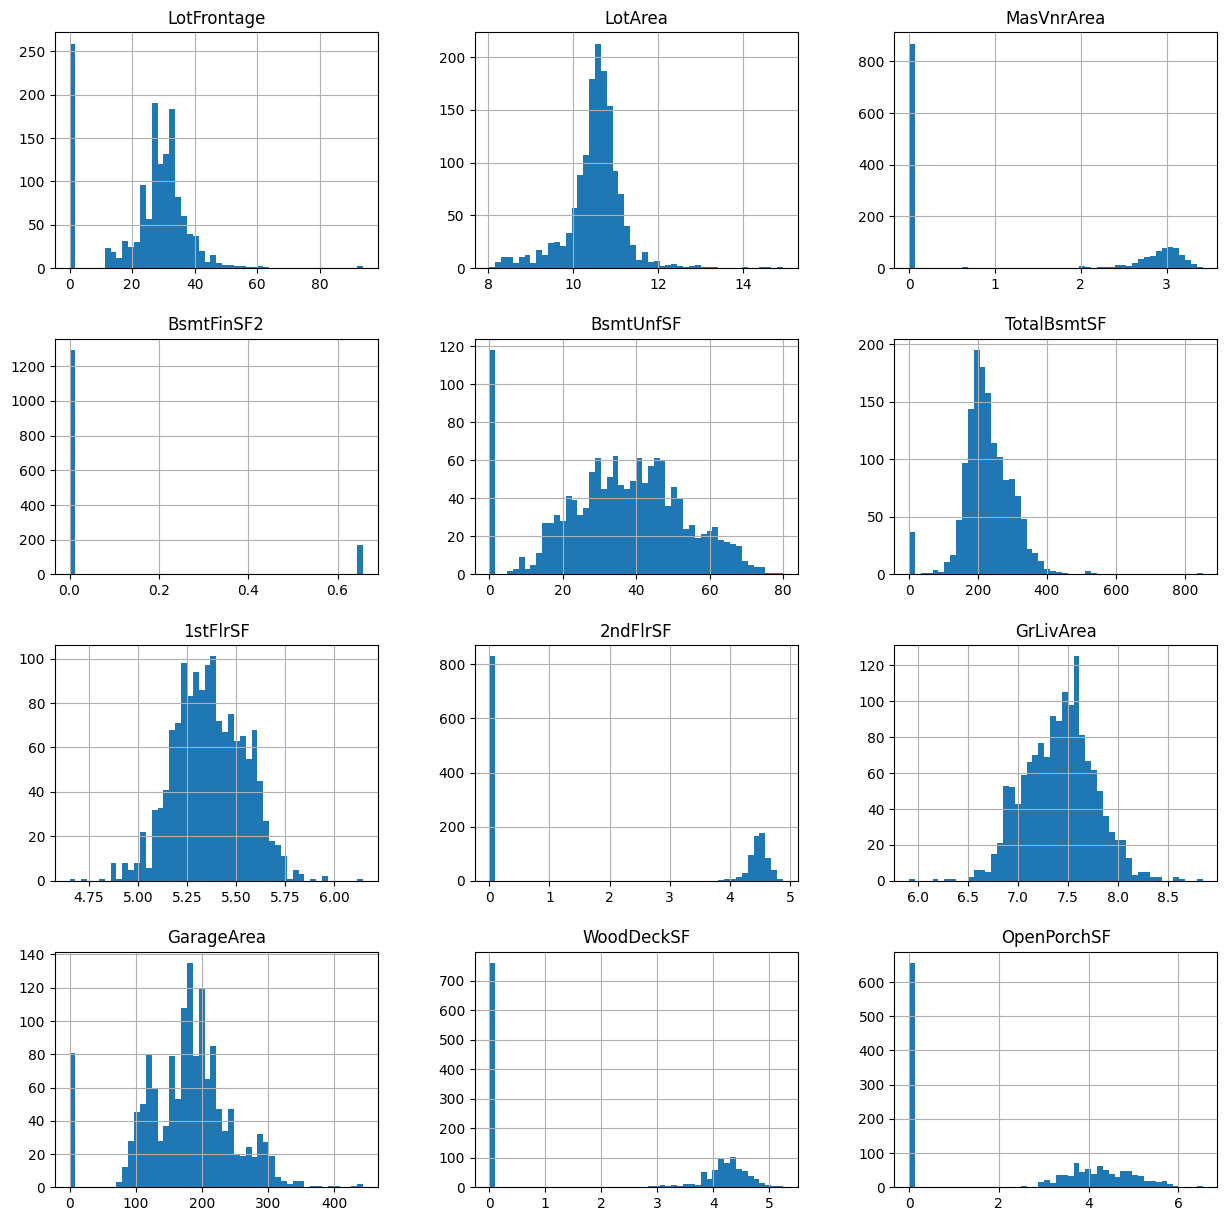

{'LotFrontage': 0.7399884055638373, 'LotArea': 0.03081855115113282, 'MasVnrArea': -0.2443014954989493, 'BsmtFinSF2': -1.52155053597437, 'BsmtUnfSF': 0.4712723287247936, 'TotalBsmtSF': 0.7396016886985572, '1stFlrSF': -0.0798771182216722, '2ndFlrSF': -0.12741731213395247, 'GrLivArea': 0.005539659293536087, 'GarageArea': 0.81125805465615, 'WoodDeckSF': -0.07859613168269475, 'OpenPorchSF': 0.011642798944736915}


In [23]:
def yeo_john_transformation(df: pd.DataFrame):

    df = df.copy()

    yeo_john_param = {}

    for var in num_skewed_vars:
        df[var].fillna(0, inplace=True)
        df[var], param = stats.yeojohnson(df[var])
        yeo_john_param[var] = param

    df[num_skewed_vars].hist(bins=50, figsize=(15, 15))
    plt.show()

    print(yeo_john_param)


yeo_john_transformation(data_df)

['LotArea', '1stFlrSF', 'GrLivArea']


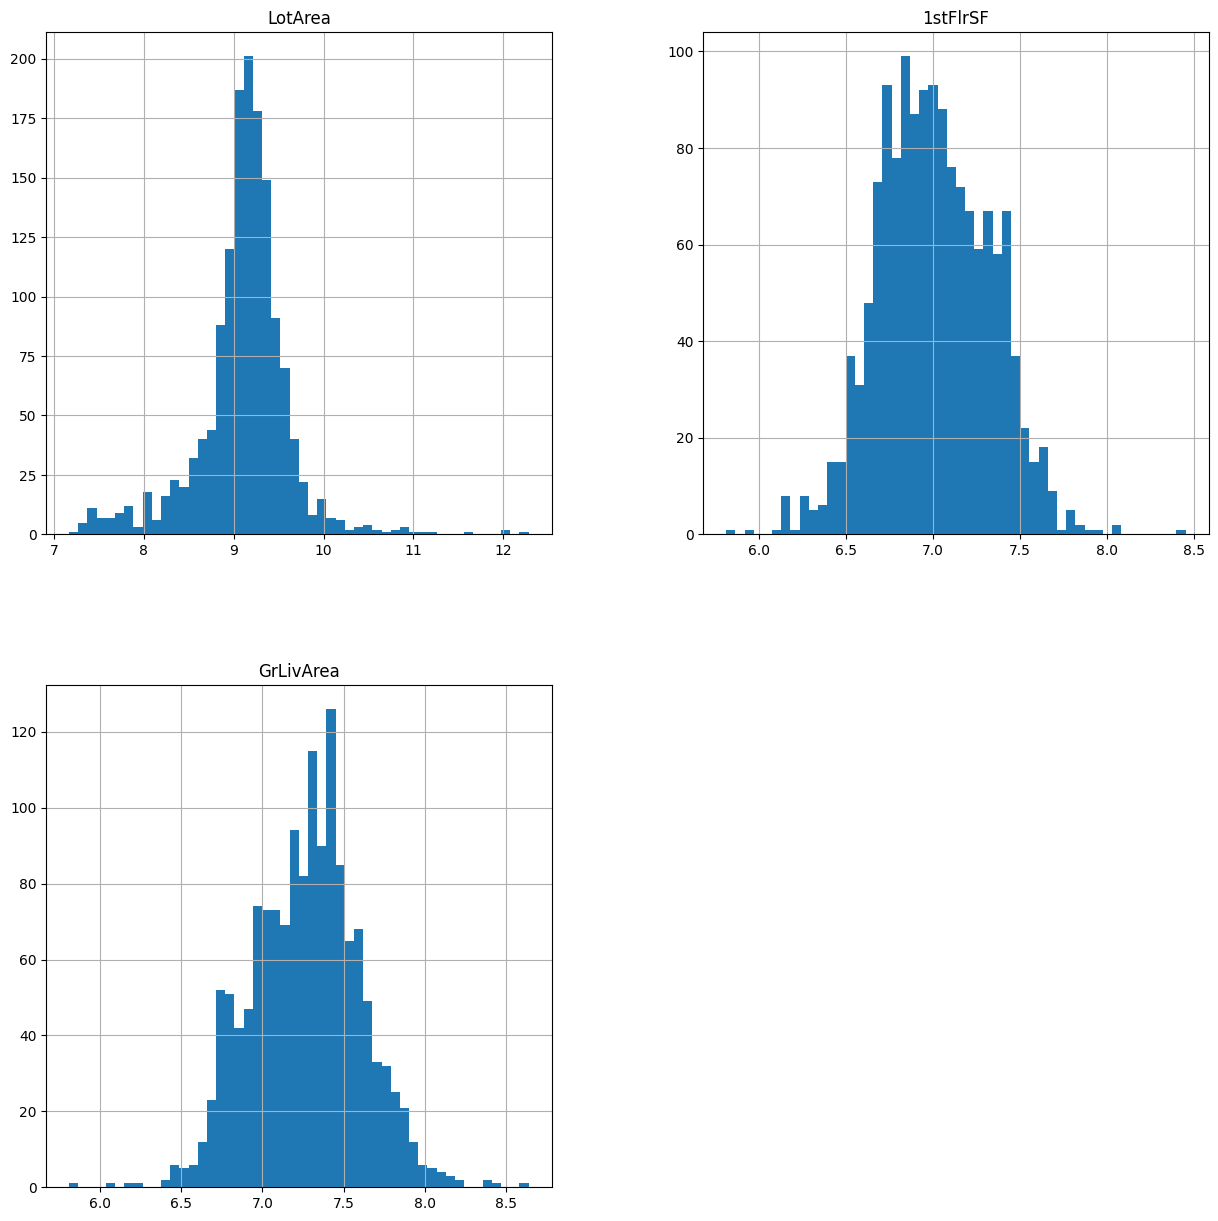

In [24]:
def log_transformation(df: pd.DataFrame):

    df = df.copy()

    # we can apply log transformation only on variables that do not have any zero or null value
    valid_vars = [
        var
        for var in num_skewed_vars
        if (df[var].isnull().sum() == 0 and len(df[df[var] == 0]) == 0)
    ]
    print(valid_vars)

    for var in valid_vars:
        df[var] = np.log(df[var])

    df[valid_vars].hist(bins=50, figsize=(15, 15))
    plt.show()


log_transformation(data_df)

It seems that logarithmic transformation works better for ['LotArea', '1stFlrSF', 'GrLivArea'] variables. In other words, these variables' distribution is more like a normal distribution.

# 5- Categorical Variables

First, we measure each categorical variable cardinality or the number of unique values in a category.

In [25]:
for var in cat_vars:
    cardinality = data_df[var].nunique()
    print(var, cardinality)

MSZoning 5
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 3
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
PoolQC 3
Fence 4
MiscFeature 4
SaleType 9
SaleCondition 6
MSSubClass 15


<Axes: >

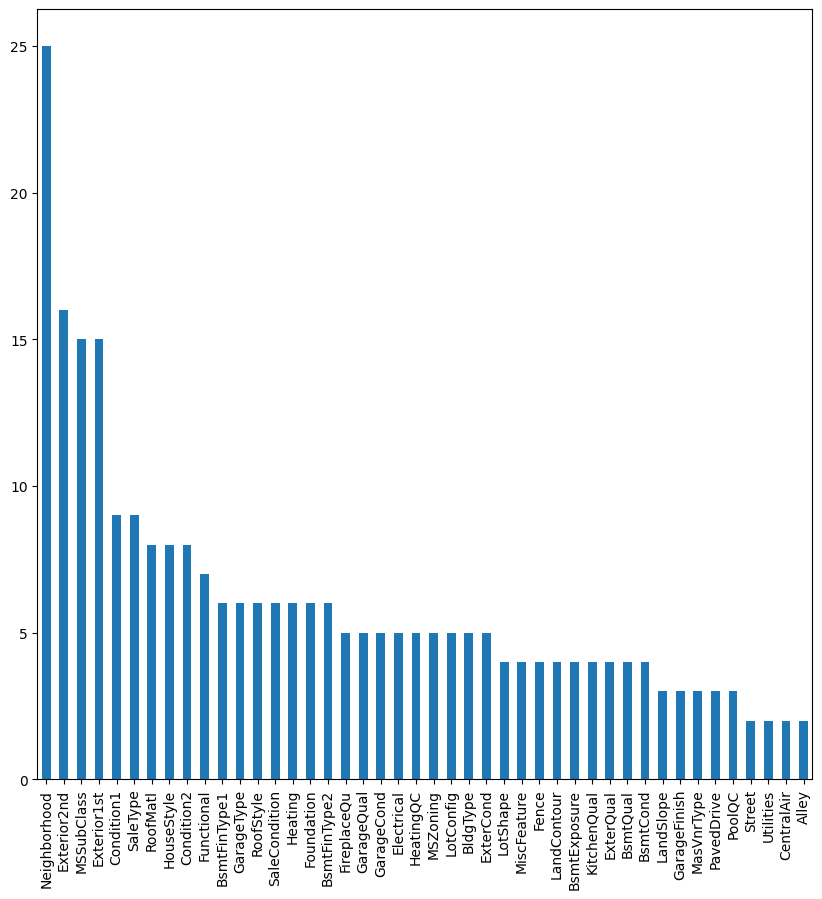

In [26]:
data_df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(10, 10))

Now, we find rare labels that are present only in a small number of houses.

In [28]:
def find_rare_labels(df: pd.DataFrame, var: str, rare_threshold: float = 0.1):
    df = df.copy()
    rare_labels = []

    var_count = data_df.groupby(var)["SalePrice"].count()
    occurrence_percentage = var_count / len(df)

    return occurrence_percentage[occurrence_percentage < rare_threshold]


for var in cat_vars:
    rare_labels = find_rare_labels(data_df, var)
    print(rare_labels, "\n")

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
Name: SalePrice, dtype: float64 

Street
Grvl    0.00411
Name: SalePrice, dtype: float64 

Alley
Grvl    0.034247
Pave    0.028082
Name: SalePrice, dtype: float64 

LotShape
IR2    0.028082
IR3    0.006849
Name: SalePrice, dtype: float64 

LandContour
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: SalePrice, dtype: float64 

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64 

LotConfig
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: SalePrice, dtype: float64 

LandSlope
Mod    0.044521
Sev    0.008904
Name: SalePrice, dtype: float64 

Neighborhood
Blmngtn    0.011644
Blueste    0.001370
BrDale     0.010959
BrkSide    0.039726
ClearCr    0.019178
Crawfor    0.034932
Edwards    0.068493
Gilbert    0.054110
IDOTRR     0.025342
MeadowV    0.011644
Mitchel    0.033562
NPkVill    0.006164
NWAmes     0.050000
NoRidge    0.028082
NridgHt    0.052740
OldTown    0.077397
SWISU      0.017123
S